### 1.-  DATA SOURCE AND IMPORT LIBRARIES
### 2.- DATA EXPLORATION
* Load the dataset
* Looking into Pearson´s correlations
* Quick check on type of variables
* Visualization of variables
* Defining dummy variables
* Descriptive analysis
* Creation of new variables (Engagement and reactions)
* Working with dates
* Working on tags

### 3.- WORD CLOUD
### 4.- TfidfVECTORIZER
### 5.- LINEAR REGRESSION
### 6.- RIDGE REGRESSION
### 7. - QUICK SENTIMENT ANALYSIS WITH TEXTBLOB

## 1.-  DATA SOURCE AND IMPORT LIBRARIES

Dataset taken from Kaggle: https://www.kaggle.com/datasnaek/youtube-new

Trending YouTube Video Statistics
Daily statistics for trending YouTube videos

Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras import regularizers
from pdpbox import pdp, info_plots 
from sklearn.model_selection import StratifiedKFold
from numpy import where
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.utils.np_utils import to_categorical
from sklearn.linear_model import LogisticRegression
import collections
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import nltk
from textblob import TextBlob
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
sns.set(style="darkgrid")
%matplotlib inline
plt.style.use('seaborn-talk')

Using TensorFlow backend.


## 2.- DATA EXPLORATION

* Load the dataset

In [125]:
mainpath = r"C:\Users\dataset"
filename = "USvideos.csv"

data = pd.read_csv(mainpath+"/"+filename)

In [126]:
print(f"Number of rows: {data.shape[0]} and number of columns: {data.shape[1]}")

Number of rows: 40949 and number of columns: 16


In [127]:
print(f"Number of nan records is: {pd.isnull(data).values.sum()}")

Number of nan records is: 570


* Looking into Pearson´s correlations

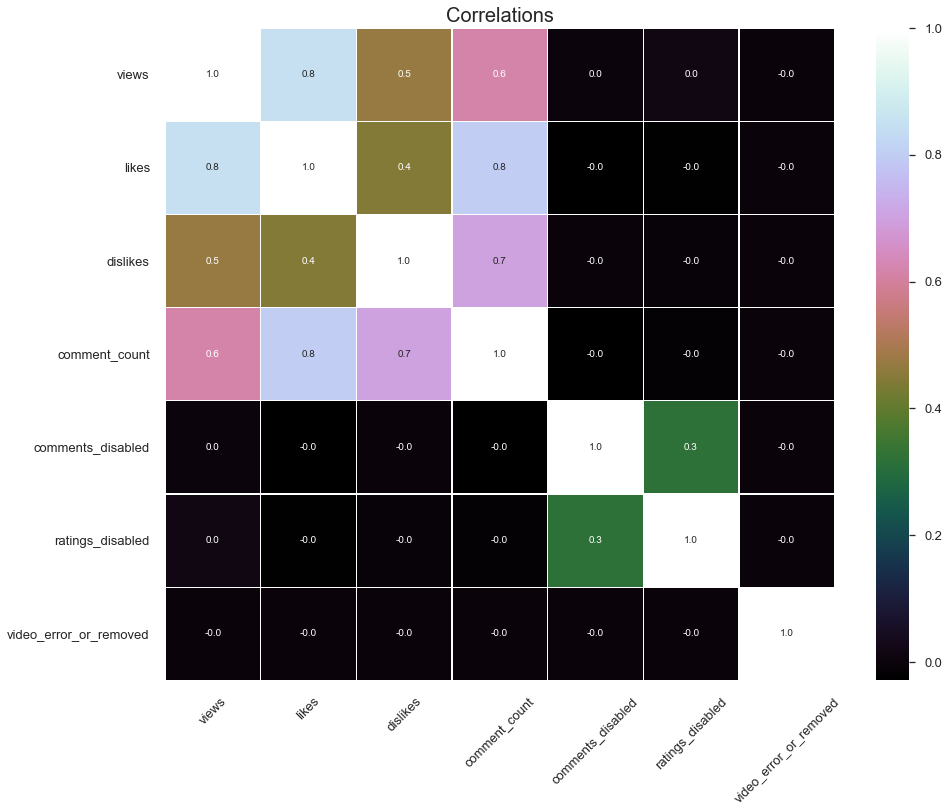

In [131]:
plt.figure(figsize=(15,12))
d1 = data.drop("category_id", axis=1)
d_cor = d1.corr()
fig = sns.heatmap(d_cor, annot=True, cmap="cubehelix", fmt=".1f", linewidths=.3)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.title("Correlations", fontsize=20)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [6]:
correlation_l = []
threshold = 0.3

for i in range(0,7):
    for j in range(i+1,7):
        if (d_cor.iloc[i,j]>=threshold and d_cor.iloc[i,j]<1) or (d_cor.iloc[i,j]<=-threshold and d_cor.iloc[i,j]<0):
            correlation_l.append([i,j,d_cor.iloc[i,j]])

In [7]:
cor_sort = sorted(correlation_l, key=lambda x: abs(x[2]))
print(cor_sort)

[[4, 5, 0.319230244184157], [1, 2, 0.4471864632166016], [0, 2, 0.4722132456459326], [0, 3, 0.6176212718159831], [2, 3, 0.7001836235661405], [1, 3, 0.8030568578359315], [0, 1, 0.8491765212088968]]


In [8]:
cols = d1.columns.values
for i,j, v in correlation_l:
    print(f"Feature: {cols[i]} and feature: {cols[j]} have a correlation: {v}")

Feature: video_id and feature: trending_date have a correlation: 0.8491765212088968
Feature: video_id and feature: title have a correlation: 0.4722132456459326
Feature: video_id and feature: channel_title have a correlation: 0.6176212718159831
Feature: trending_date and feature: title have a correlation: 0.4471864632166016
Feature: trending_date and feature: channel_title have a correlation: 0.8030568578359315
Feature: title and feature: channel_title have a correlation: 0.7001836235661405
Feature: publish_time and feature: tags have a correlation: 0.319230244184157


* Quick check on type of variables

In [9]:
cols = data.columns.values.tolist()

for i in cols:
    print(f"Feature: '{i}' with datatype: {data[i].dtypes}")

Feature: 'video_id' with datatype: object
Feature: 'trending_date' with datatype: object
Feature: 'title' with datatype: object
Feature: 'channel_title' with datatype: object
Feature: 'category_id' with datatype: int64
Feature: 'publish_time' with datatype: object
Feature: 'tags' with datatype: object
Feature: 'views' with datatype: int64
Feature: 'likes' with datatype: int64
Feature: 'dislikes' with datatype: int64
Feature: 'comment_count' with datatype: int64
Feature: 'thumbnail_link' with datatype: object
Feature: 'comments_disabled' with datatype: bool
Feature: 'ratings_disabled' with datatype: bool
Feature: 'video_error_or_removed' with datatype: bool
Feature: 'description' with datatype: object


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [11]:
obj_cols = []
int64_cols = []
b_cols = []

for i in cols:
    if data[i].dtypes == "object":
        obj_cols.append(i)
    elif data[i].dtypes == "int64":
        int64_cols.append(i)
    else:
        b_cols.append(i)
        
print(f"Object features: {obj_cols} \nInt64 features: {int64_cols} \nBoolean features: {b_cols}")

Object features: ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description'] 
Int64 features: ['category_id', 'views', 'likes', 'dislikes', 'comment_count'] 
Boolean features: ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']


* Visualization of variables

In [12]:
def plot_distp(variable):
    sns.distplot(data[variable], bins=35, kde=True)
    plt.title(f"Distribution plot for {variable}", fontsize=15)
    plt.xticks(rotation=45)

In [13]:
data["views_log"] =  np.log(data["views"]+1)
data["likes_log"] =  np.log(data["likes"]+1)
data["dislikes_log"] =  np.log(data["dislikes"]+1)
data["comments_c_log"] =  np.log(data["comment_count"]+1)

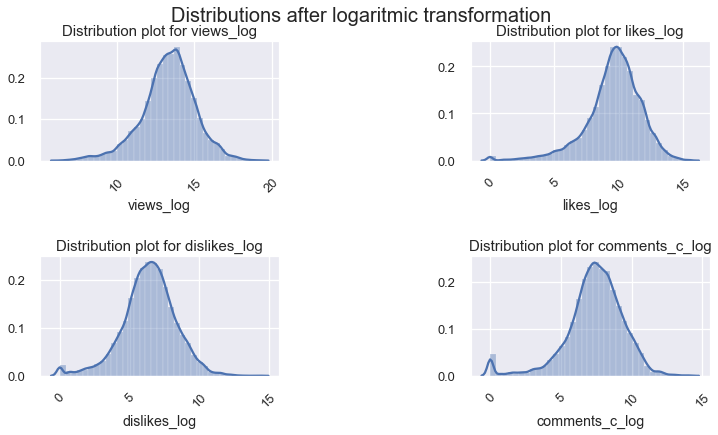

In [14]:
fig, ax = plt.subplots(2,2, figsize=(12,6))

plt.subplot(2,2,1)
plot_distp("views_log")
plt.subplot(2,2,2)
plot_distp("likes_log")
plt.subplot(2,2,3)
plot_distp("dislikes_log")
plt.subplot(2,2,4)
plot_distp("comments_c_log")
plt.subplots_adjust(wspace = 0.8, hspace = 0.8,top = 0.9)
plt.suptitle("Distributions after logaritmic transformation ", fontsize=20)
plt.show()

In [15]:
def num_cats(variable):
    print(f" The number of unique values for feature: {variable} is: {data[variable].nunique()}")

In [16]:
for i in b_cols:
    num_cats(i)

 The number of unique values for feature: comments_disabled is: 2
 The number of unique values for feature: ratings_disabled is: 2
 The number of unique values for feature: video_error_or_removed is: 2


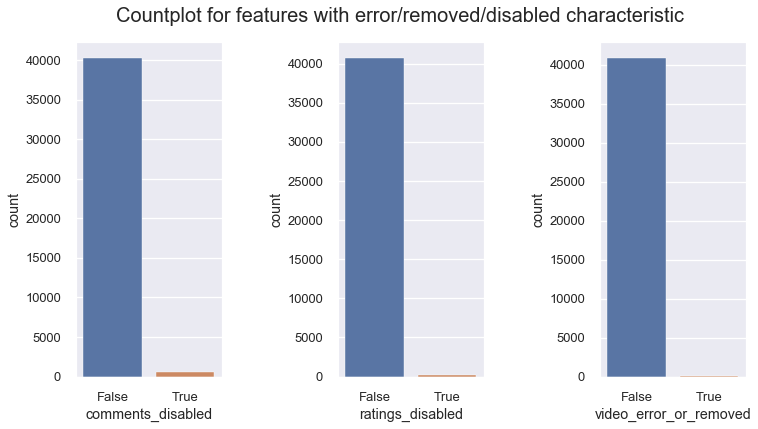

In [18]:
data2 = data[b_cols]
plt.subplots(1,3, figsize=(12,6))

for i in range(len(b_cols)):
    plt.subplot(1,3,i+1)
    sns.countplot(data2.iloc[:,i])  
plt.subplots_adjust(wspace = 0.8, hspace = 0.8,top = 0.9)
plt.suptitle("Countplot for features with error/removed/disabled characteristic", fontsize=20)
plt.show()

* Defining dummy variables

In [19]:
def define_dummies(data, variable):
    dum = pd.get_dummies(data[variable], prefix=variable)
    data = data.drop(variable, axis=1)
    data = pd.concat([data, dum], axis=1)
    return data

In [20]:
for i in b_cols:
     data = define_dummies(data, i)

* Descriptive analysis

In [21]:
# Finding the video_id per category with most likes

g1 = data.groupby("category_id").apply(lambda x: x.nlargest(1, "likes"))
g1.head(3)

,,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,views_log,likes_log,dislikes_log,comments_c_log,comments_disabled_False,comments_disabled_True,ratings_disabled_False,ratings_disabled_True,video_error_or_removed_False,video_error_or_removed_True
category_id,,,,,,,,,,,,,,,,,,,,,,,,
1,39948,ulNswX3If6U,18.09.06,Selena Gomez - Back To You (Lyric Video),Selena Gomez,1,2018-05-10T16:00:11.000Z,"selena gomez|""13 reasons why""|""back to you""|""s...",54863912,922355,18037,41774,https://i.ytimg.com/vi/ulNswX3If6U/default.jpg,"Get 'Back To You,' out now: http://smarturl.it...",17.820366,13.734687,9.800236,10.640053,1,0,1,0,1,0
2,7996,muAPJiMho2Y,17.23.12,DELIT DE FUITE - le Justicier de Noël,CHRIS-RS,2,2017-12-15T16:00:03.000Z,"Z800|""Z800E""|""KAWASAKI""|""PARIS""|""GOPRO""|""CAM""|...",3044139,97030,928,10591,https://i.ytimg.com/vi/muAPJiMho2Y/default.jpg,"Et bien oui...encore un délit de fuite, je sui...",14.928729,11.482786,6.834109,9.267854,1,0,1,0,1,0
10,38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,18.627784,15.540743,12.239957,14.021431,1,0,1,0,1,0


In [22]:
# Finding the video with most likes

a = data[data["likes"]==data["likes"].max()]
a

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,views_log,likes_log,dislikes_log,comments_c_log,comments_disabled_False,comments_disabled_True,ratings_disabled_False,ratings_disabled_True,video_error_or_removed_False,video_error_or_removed_True
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,18.627784,15.540743,12.239957,14.021431,1,0,1,0,1,0


In [23]:
print(f"The video id and number of likes: {a[['video_id','title', 'likes']]}")

The video id and number of likes:           video_id                                title    likes
38273  7C2z4GqqS5E  BTS (방탄소년단) 'FAKE LOVE' Official MV  5613827


In [24]:
# Finding the video id with highest views

b = data[data["views"]==data["views"].max()]
b

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,views_log,likes_log,dislikes_log,comments_c_log,comments_disabled_False,comments_disabled_True,ratings_disabled_False,ratings_disabled_True,video_error_or_removed_False,video_error_or_removed_True
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,“This is America” by Childish Gambino http://s...,19.232552,15.429628,12.747065,13.156249,1,0,1,0,1,0


In [25]:
print(f"The video id  and number of wiews: {b[['video_id', 'title', 'views']]}")

The video id  and number of wiews:           video_id                                              title  \
38547  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   

           views  
38547  225211923  


In [26]:
# Finding the most disliked video

c = data[data["dislikes"]==data["dislikes"].max()]
c

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,views_log,likes_log,dislikes_log,comments_c_log,comments_disabled_False,comments_disabled_True,ratings_disabled_False,ratings_disabled_True,video_error_or_removed_False,video_error_or_removed_True
11323,QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,NaN,17.440906,14.153823,14.330978,14.124157,1,0,1,0,1,0


In [27]:
print(f"The video id and number of dislikes: {c[['video_id', 'title', 'dislikes']]}")

The video id and number of dislikes:           video_id      title  dislikes
11323  QwZT7T-TXT0  So Sorry.   1674420


In [28]:
# Information about the categories taken from Kaggle: https://www.kaggle.com/kabure/extensive-usa-youtube-eda

data["category"] = np.nan

data.loc[data["category_id"]==1, "category"]='Film and Animation'
data.loc[(data["category_id"] == 2),"category"] = 'Cars and Vehicles'
data.loc[(data["category_id"] == 10),"category"] = 'Music'
data.loc[(data["category_id"] == 15),"category"] = 'Pets and Animals'
data.loc[(data["category_id"] == 17),"category"] = 'Sport'
data.loc[(data["category_id"] == 19),"category"] = 'Travel and Events'
data.loc[(data["category_id"] == 20),"category"] = 'Gaming'
data.loc[(data["category_id"] == 22),"category"] = 'People and Blogs'
data.loc[(data["category_id"] == 23),"category"] = 'Comedy'
data.loc[(data["category_id"] == 24),"category"] = 'Entertainment'
data.loc[(data["category_id"] == 25),"category"] = 'News and Politics'
data.loc[(data["category_id"] == 26),"category"] = 'How to and Style'
data.loc[(data["category_id"] == 27),"category"] = 'Education'
data.loc[(data["category_id"] == 28),"category"] = 'Science and Technology'
data.loc[(data["category_id"] == 29),"category"] = 'Non Profits and Activism'


In [29]:
cat_l = set(data["category"].values.tolist())
cat_l = [x for x in cat_l if str(x)!='nan']

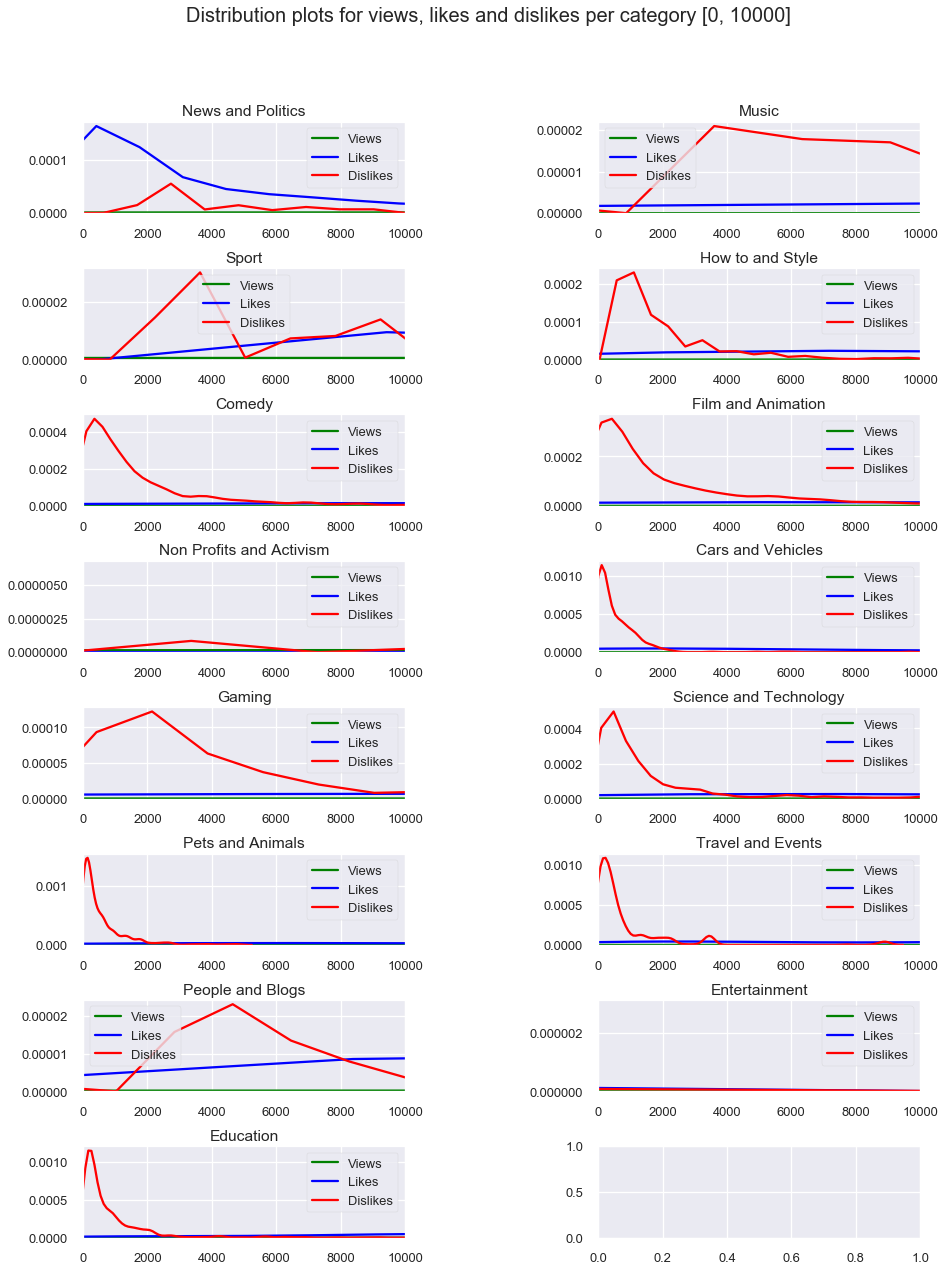

In [30]:
fig, ax = plt.subplots(8,2, figsize=(15,20))

k =  0

for i in cat_l:
    k+=1
    plt.subplot(8,2,k)
    g = sns.distplot(data["views"].loc[data["category"]==i], color="green", label="Views", hist=False, bins=100)
    g = sns.distplot(data["likes"].loc[data["category"]==i], color="blue", label="Likes", hist=False, bins=100)
    g = sns.distplot(data["dislikes"].loc[data["category"]==i], color="red", label="Dislikes", hist=False, bins=100)
    plt.xlim(0,10000)
    g.set(xlabel=None)
    plt.title(i)
    plt.suptitle("Distribution plots for views, likes and dislikes per category [0, 10000]", fontsize=20)
    plt.legend()
plt.subplots_adjust(wspace = 0.6, hspace = 0.6,top = 0.9)

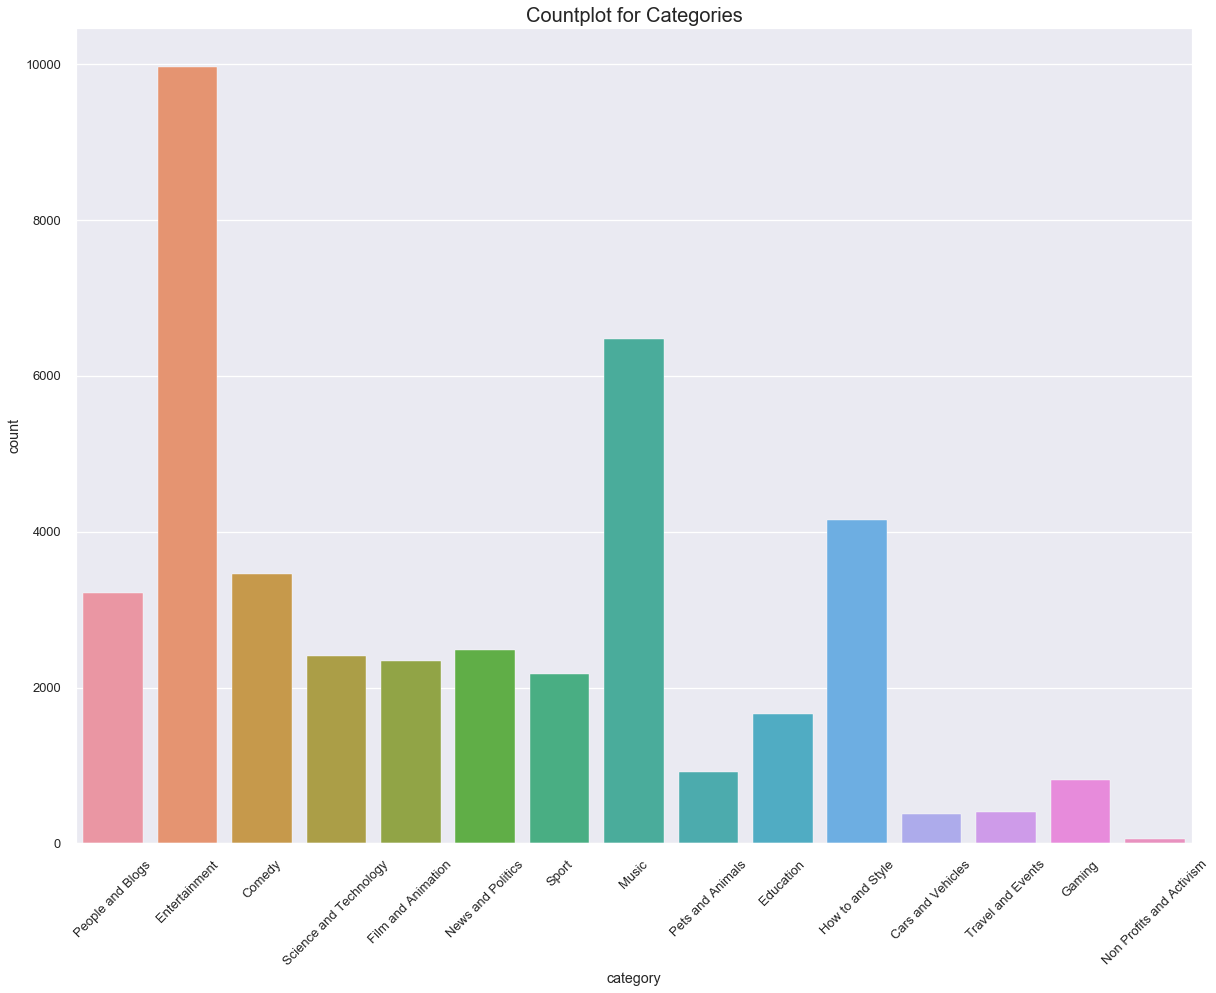

In [31]:
plt.figure(figsize=(20,15))
sns.countplot(x="category", data=data)
plt.title("Countplot for Categories",fontsize=20)
plt.xticks(rotation=45)
plt.show()

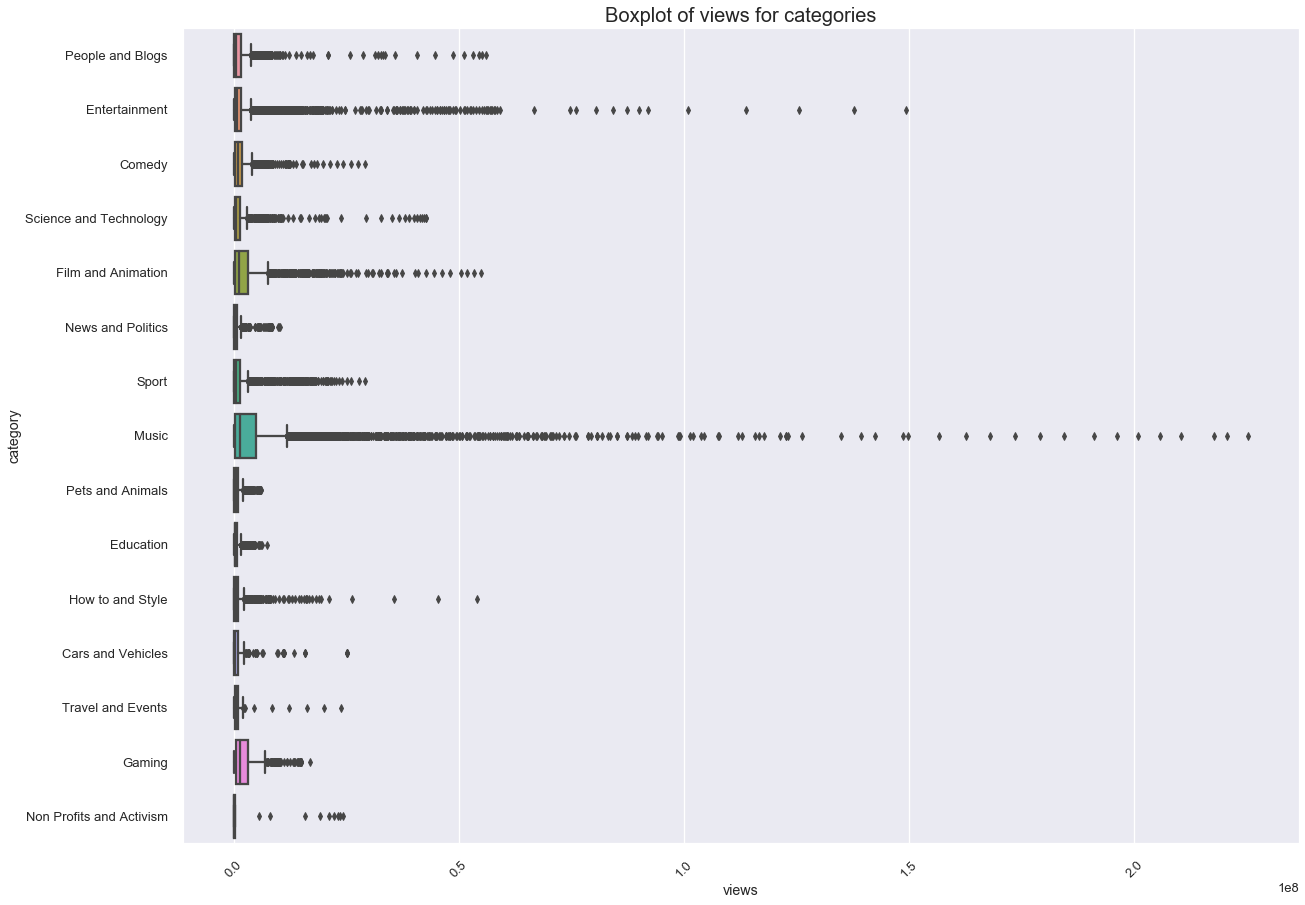

In [32]:
plt.figure(figsize=(20,15))
sns.boxplot(data=data, orient="h", y=data["category"], x=data["views"])
plt.xticks(rotation=45)
plt.title("Boxplot of views for categories", fontsize=20)
plt.show()

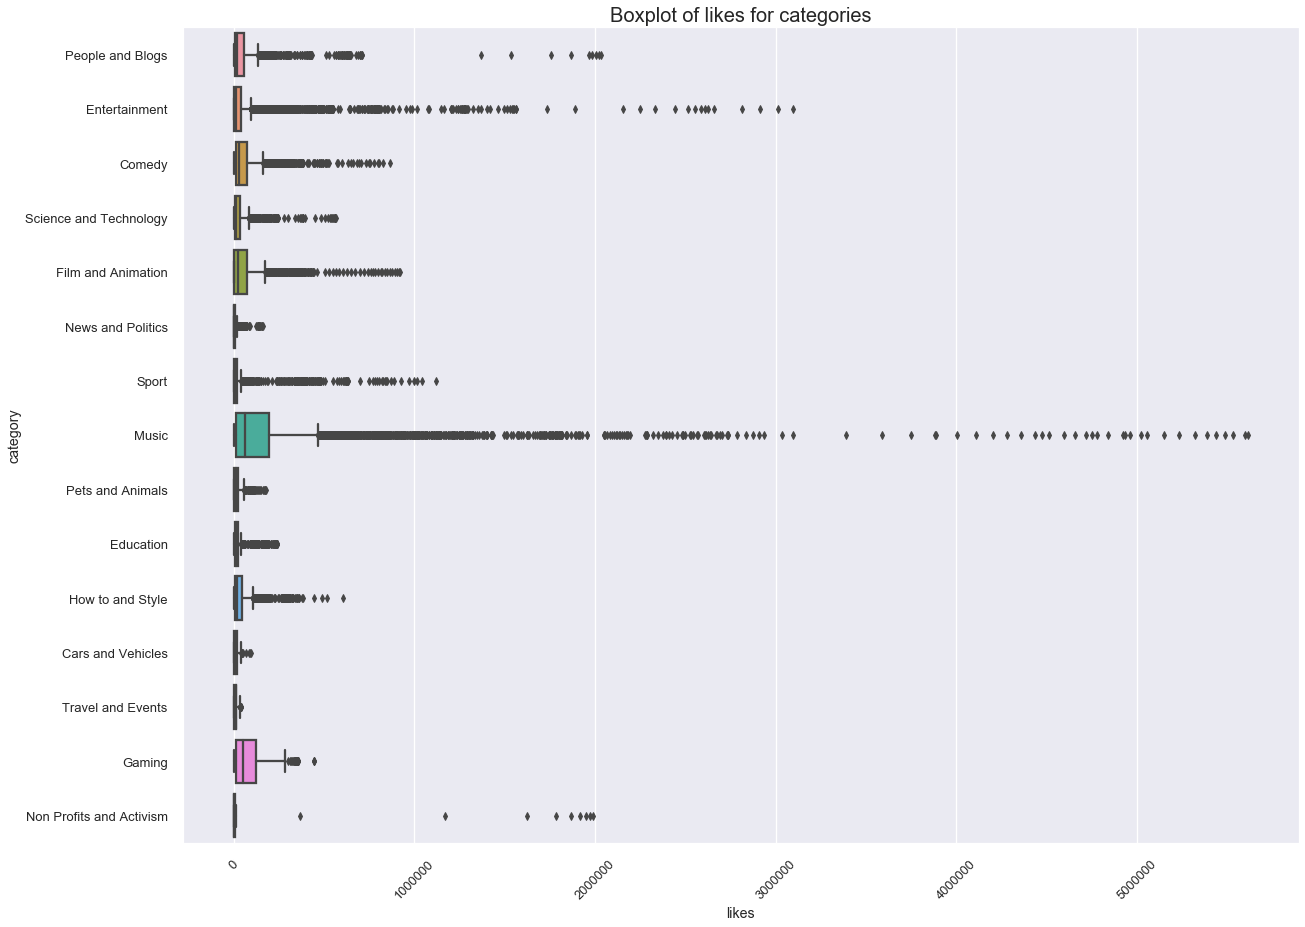

In [33]:
plt.figure(figsize=(20,15))
sns.boxplot(data=data, orient="h", y=data["category"], x=data["likes"])
plt.xticks(rotation=45)
plt.title("Boxplot of likes for categories", fontsize=20)
plt.show()

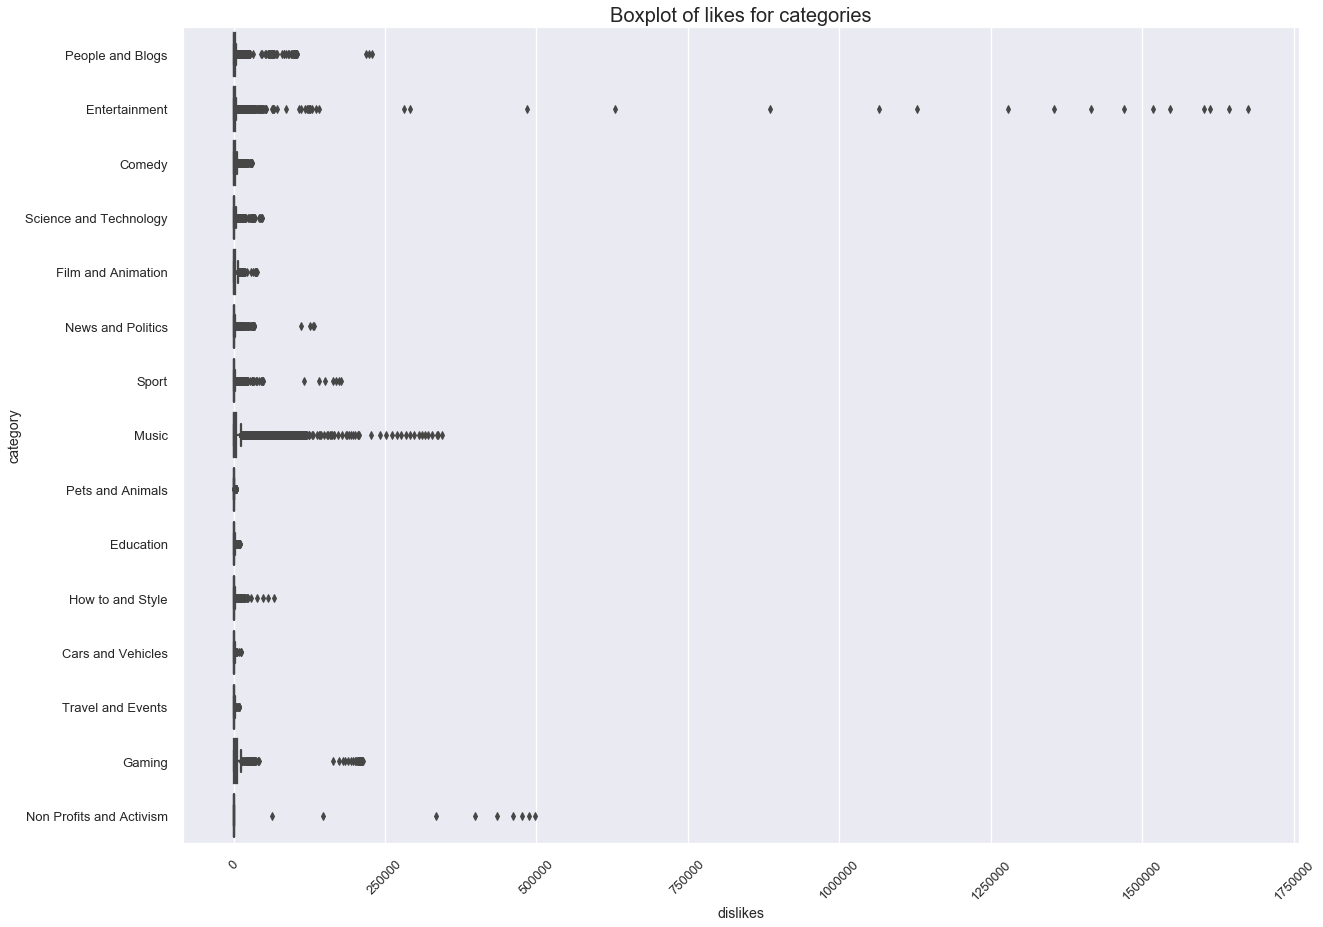

In [34]:
plt.figure(figsize=(20,15))
sns.boxplot(data=data, orient="h", y=data["category"], x=data["dislikes"])
plt.xticks(rotation=45)
plt.title("Boxplot of likes for categories", fontsize=20)
plt.show()

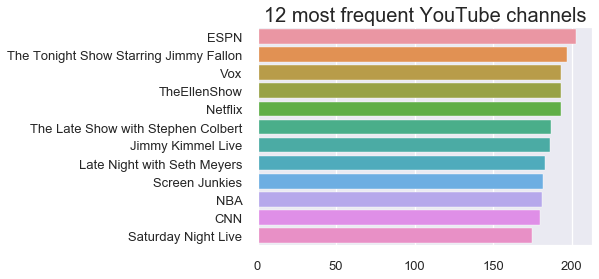

In [35]:
chan = data.groupby(["channel_title"]).size().sort_values(ascending=False).head(12)
sns.barplot(chan.values, chan.index)
plt.ylabel(None)
plt.title("12 most frequent YouTube channels", fontsize=20)
plt.show()

* Creation of new variables (Engagement and reactions)

In [36]:
data["com_perc"] = data["comment_count"] / data["views"]
data["reaction_perc"] = (data["likes"] + data["dislikes"]) / data["views"]

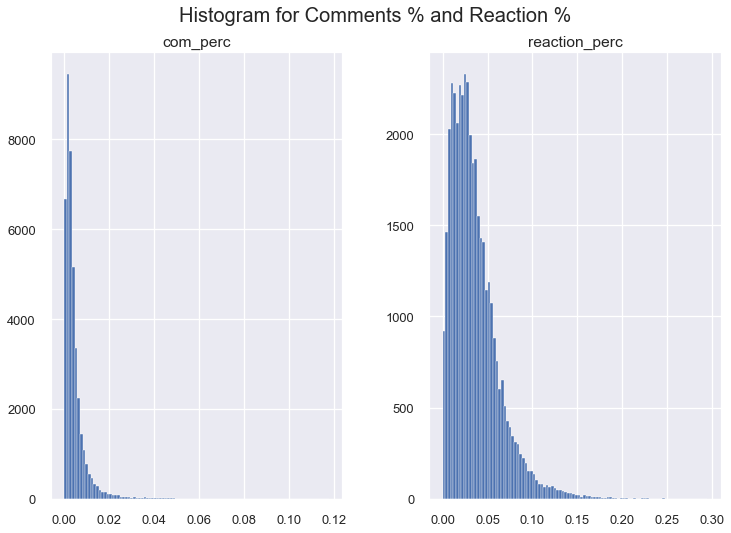

In [37]:
nd = data[["com_perc","reaction_perc"]]

new_var = ["com_perc","reaction_perc"]

plt.subplots(1,2,figsize=(12,8))
for i in range(len(new_var)):
    plt.subplot(1,2, i+1)
    plt.hist(x=nd.iloc[:,i], bins=100)
    plt.title(new_var[i])
plt.suptitle("Histogram for Comments % and Reaction %", fontsize=20)
plt.subplots_adjust(wspace = 0.3, hspace = 0.3,top = 0.9)
plt.show()

In [38]:
data["dislikes"] = data["dislikes"].apply(lambda x: 1 if (x==np.inf or x==0) else x)

In [39]:
data["ld_rat"] = data["likes"] / data["dislikes"]
data["ld_rat_log"] = np.log(data["ld_rat"]+1)

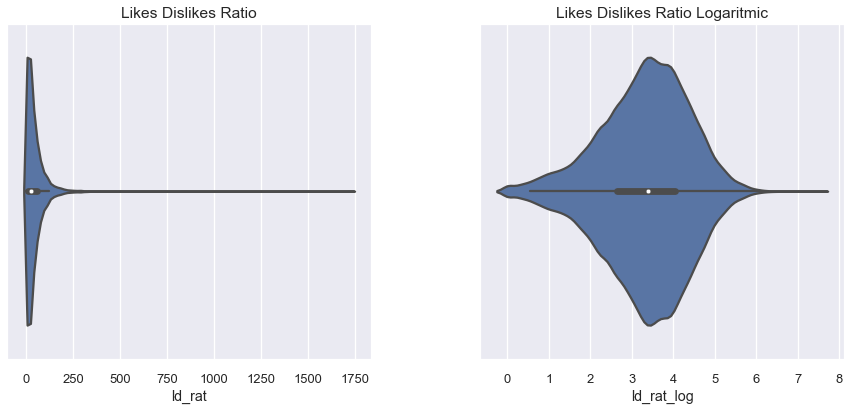

In [40]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
plt.subplot(121)
plt.title("Likes Dislikes Ratio")
sns.violinplot(data["ld_rat"])
plt.subplot(122)
sns.violinplot(data["ld_rat_log"])
plt.title("Likes Dislikes Ratio Logaritmic")
plt.subplots_adjust(wspace = 0.3, hspace = 0.3,top = 0.9)
plt.show()

* Working with dates

In [41]:
print(f"Trending date type: {data['trending_date'].dtype} \nPublish time type: {data['publish_time'].dtype}")

Trending date type: object 
Publish time type: object


In [42]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format = "%y.%d.%m")
data['publish_time'] = pd.to_datetime(data["publish_time"])

In [43]:
data["day_td"] = data['trending_date'].dt.day
data["day_pt"] = data['publish_time'].dt.day
data["month_td"] = data['trending_date'].dt.month
data["month_pt"] = data['publish_time'].dt.month
data["year_td"] = data['trending_date'].dt.year
data["year_pt"] = data['publish_time'].dt.year
data["dweek_td"] = data['trending_date'].dt.dayofweek
data["dweek_pt"] = data['publish_time'].dt.dayofweek
data["hour_pt"] = data['publish_time'].dt.hour

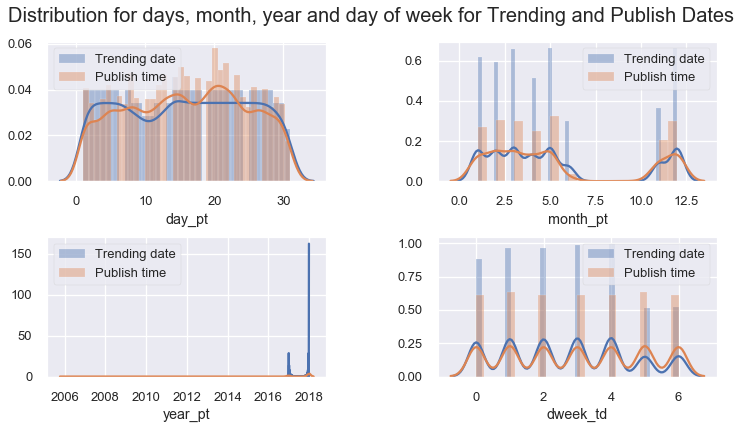

In [44]:
plt.subplots(2,2, figsize=(12,6))

dtrend = data[['day_td', 'month_td', 'year_td', 'dweek_pt']]
dpubl = data[['day_pt', 'month_pt', 'year_pt', 'dweek_td']]

size =dtrend.shape[1]

for i in range(size):
    
    plt.subplot(2,2, i+1)
    sns.distplot(dtrend.iloc[:,i], label="Trending date")
    sns.distplot(dpubl.iloc[:,i], label="Publish time")
    plt.suptitle("Distribution for days, month, year and day of week for Trending and Publish Dates", fontsize=20)
    plt.legend()
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()   

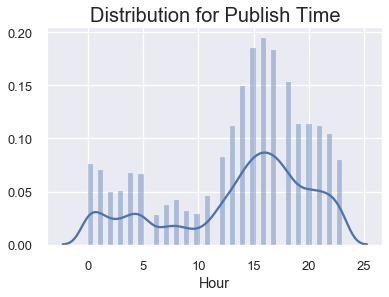

In [45]:
sns.distplot(data["hour_pt"])
plt.title("Distribution for Publish Time", fontsize=20)
plt.xlabel("Hour")
plt.show()

In [46]:
data=data.assign(publish_day=data.publish_time.dt.day,
                 publish_month=data.publish_time.dt.month,
                 publish_year=data.publish_time.dt.year)

In [47]:
data=data.assign(trending_day=data.trending_date.dt.day,
                 trending_month=data.trending_date.dt.month,
                 trending_year=data.trending_date.dt.year)

In [48]:
data.groupby("publish_year")["views", "likes", "dislikes", "comment_count", "com_perc", "reaction_perc"].mean()

,views,likes,dislikes,comment_count,com_perc,reaction_perc
publish_year,,,,,,
2006,2.585060e+05,459.000000,152.000000,82.000000,0.000317,0.002364
2008,5.705455e+04,208.636364,3.909091,49.909091,0.000709,0.003170
2009,2.446900e+04,118.071429,1.714286,12.642857,0.000304,0.002218
2010,5.297821e+04,147.052632,13.473684,41.052632,0.000669,0.002885
2011,4.349544e+04,376.407407,118.814815,164.888889,0.004219,0.012092
2012,6.792433e+04,288.791667,8.791667,46.916667,0.000667,0.004161
2013,2.724989e+04,91.022727,15.136364,11.772727,0.000559,0.004626
2014,8.495266e+04,704.906250,40.343750,168.937500,0.001784,0.008588
2015,9.482117e+04,1684.000000,29.542857,200.771429,0.001017,0.007878


In [49]:
data.groupby("trending_year")["views", "likes", "dislikes", "comment_count", "com_perc", "reaction_perc"].mean()

,views,likes,dislikes,comment_count,com_perc,reaction_perc
trending_year,,,,,,
2017,1.296250e+06,47541.609271,3022.439479,5805.945937,0.005013,0.038731
2018,2.686777e+06,82450.724074,3922.393665,9255.513190,0.004282,0.035199


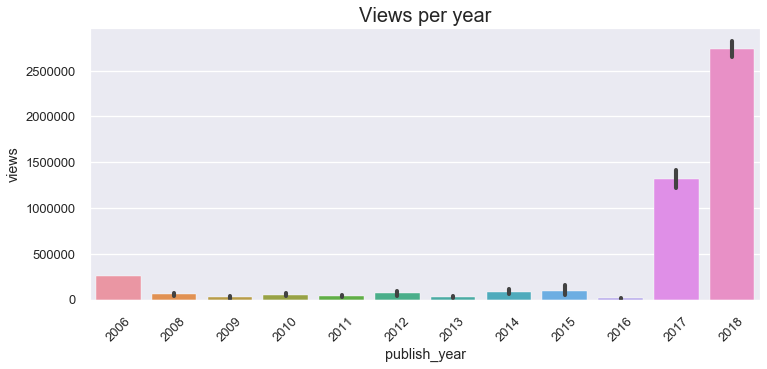

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(x=data["publish_year"], y=data["views"])
plt.xticks(rotation=45)
plt.title("Views per year", fontsize=20)
plt.show()

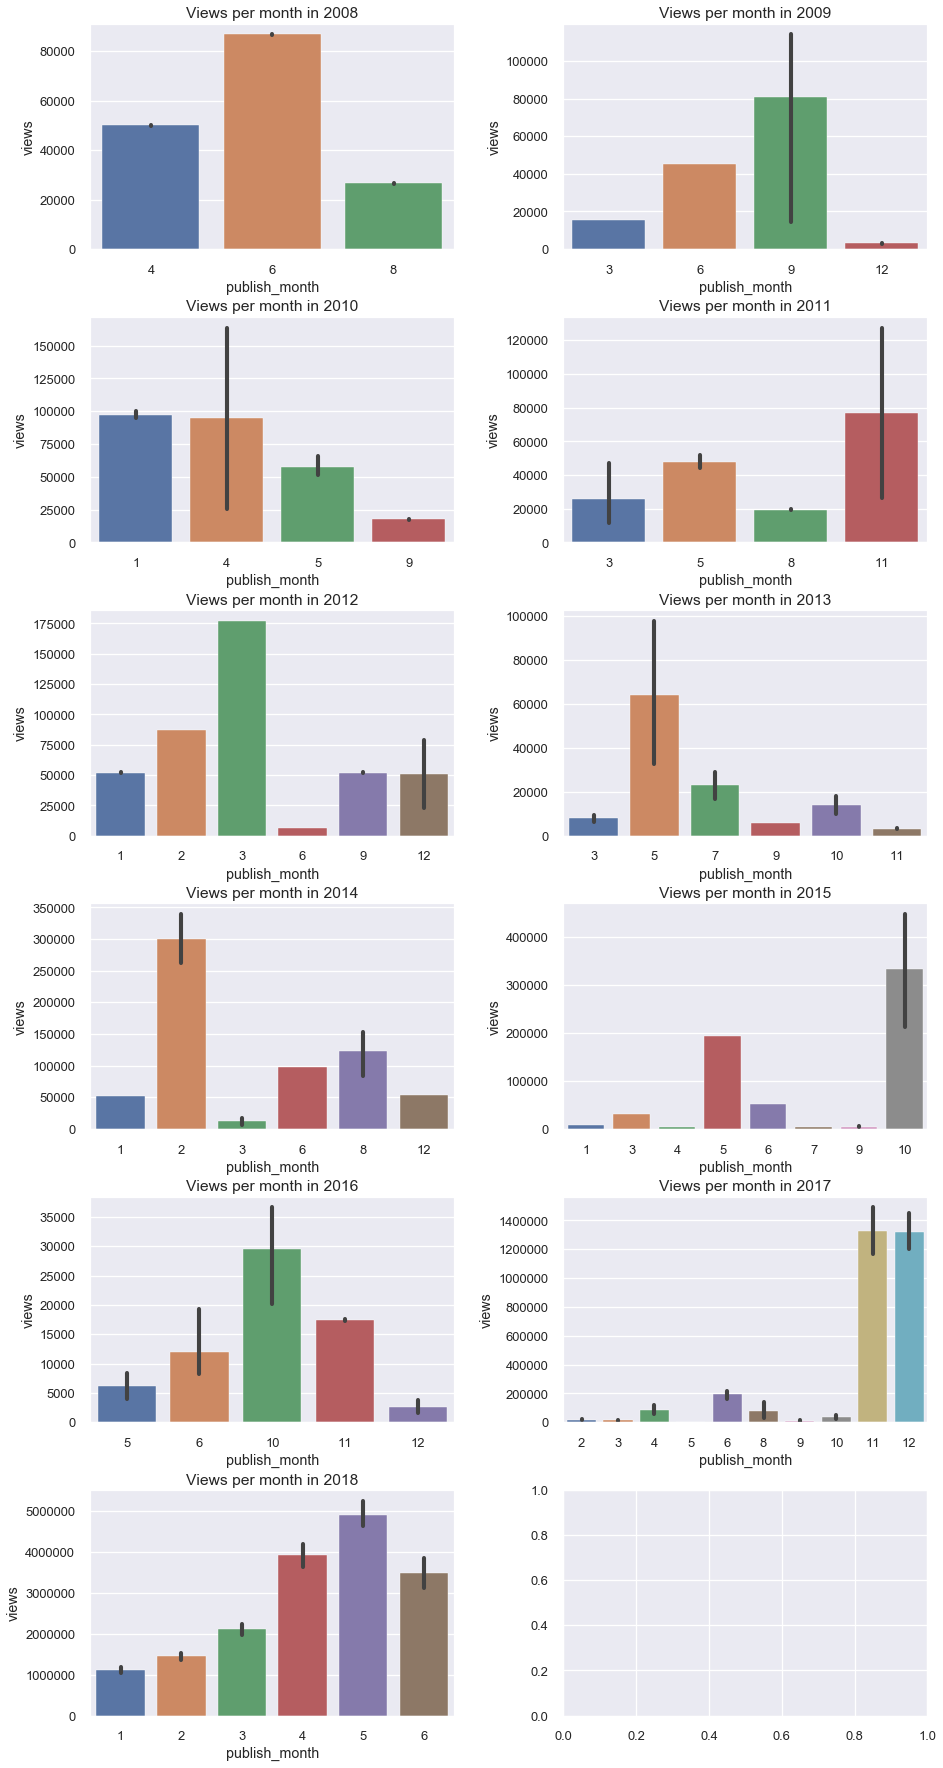

In [51]:
yrs = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

plt.subplots(6,2, figsize=(15,20))

k=0

for i in yrs:
    k+=1
    plt.subplot(6,2, k)
    d4 = data[data["publish_year"]==i]
    sns.barplot(x=d4["publish_month"], y=d4["views"])
    plt.title(f"Views per month in {i}")
plt.subplots_adjust(wspace = 0.3, hspace = 0.3,top = 1.3)
plt.show()

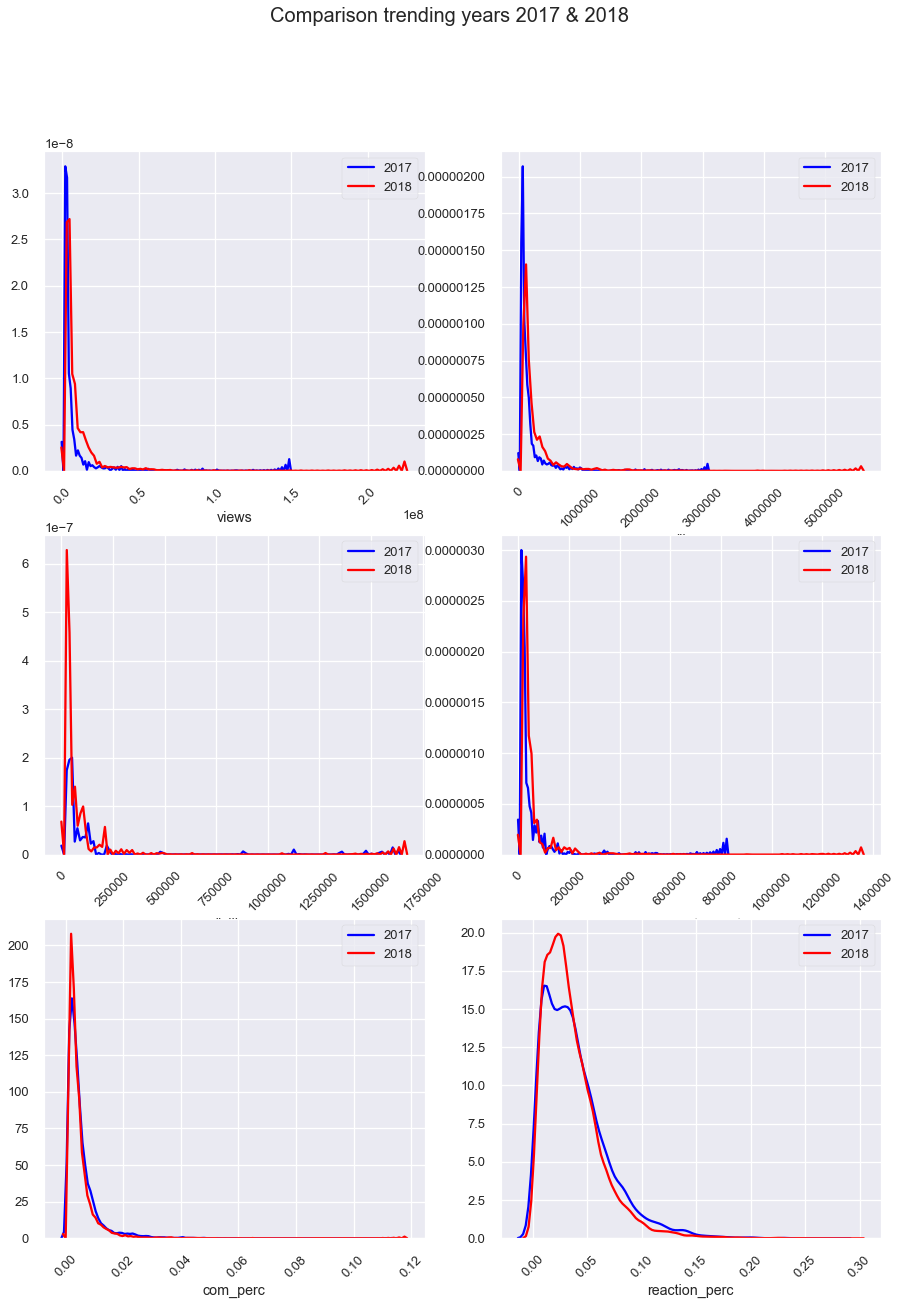

In [52]:
vr = ["views", "likes", "dislikes", "comment_count", "com_perc", "reaction_perc"]

plt.subplots(3,2,figsize=(15,20))
k=0
for i in vr:
    k+=1
    plt.subplot(3,2, k)
    sns.distplot(data[data["trending_year"]==2017].loc[:,i], hist=False, color="blue", label=2017)
    sns.distplot(data[data["trending_year"]==2018].loc[:,i], hist=False, color="red", label=2018)
    plt.xticks(rotation=45)
    plt.legend()
plt.suptitle("Comparison trending years 2017 & 2018", fontsize=20)
plt.show()

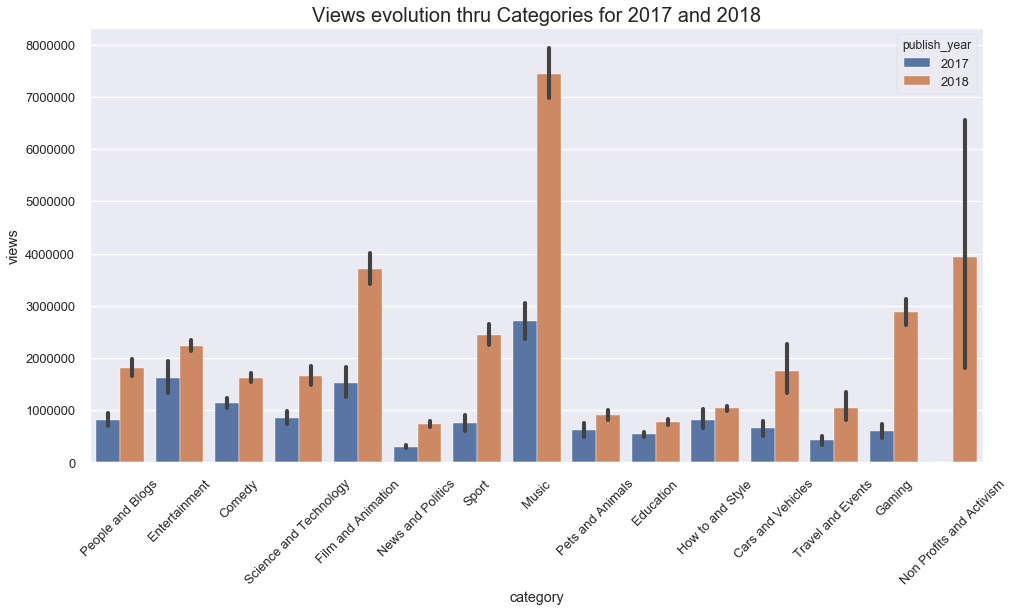

In [53]:
d5 = data[(data["publish_year"]==2017) | (data["publish_year"]==2018)]

plt.figure(figsize=(16,8))
sns.barplot(x=d5["category"], y=d5["views"], hue=d5["publish_year"])
plt.xticks(rotation=45)
plt.title("Views evolution thru Categories for 2017 and 2018", fontsize=20)
plt.show()

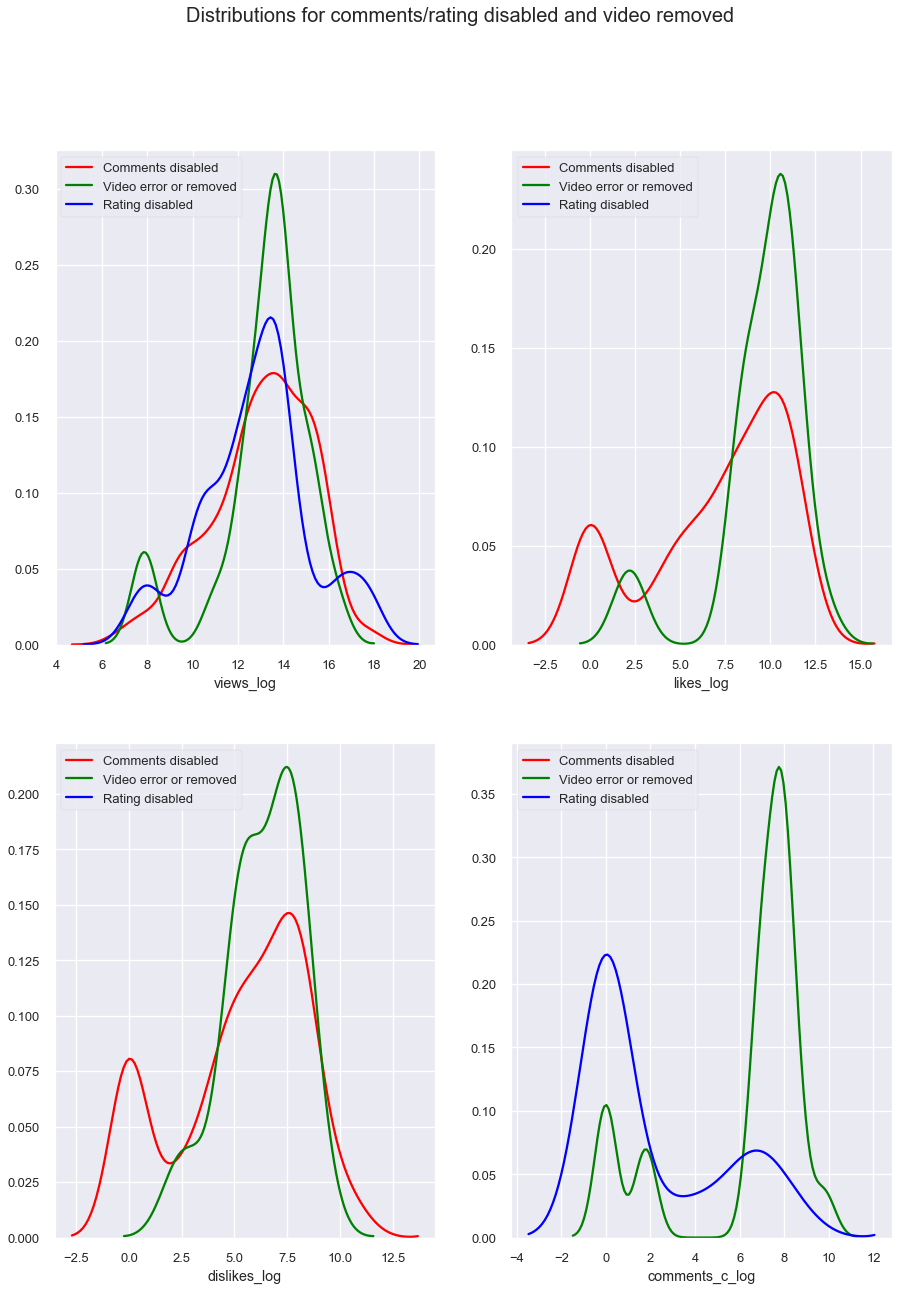

In [54]:
d5 = data[data["comments_disabled_True"]==1]
d6 = data[data["video_error_or_removed_True"]==1]
d7 = data[data["ratings_disabled_True"]==1]

c2 = ["views_log", "likes_log", "dislikes_log", "comments_c_log"]

plt.subplots(2,2, figsize=(15,20))
k=0
for i in c2:
    k+=1
    plt.subplot(2,2, k)
    sns.distplot(d5.loc[:,i], hist=False,  color="red", label="Comments disabled")
    sns.distplot(d6.loc[:,i], hist=False, color="green", label="Video error or removed")
    sns.distplot(d7.loc[:,i], hist=False, color="blue", label="Rating disabled")
    plt.legend()
plt.suptitle("Distributions for comments/rating disabled and video removed", fontsize=20)
plt.show()

In [55]:
# Looking into variables overtime ("Trending Date")

def varovertime(data, var):
    dtm = data[data[var]!=0].groupby("trending_date").mean()
    plt.plot(dtm.index, dtm[var])
    plt.xticks(rotation=45)
    plt.title(f" Mean value for {var} over time")
plt.show()

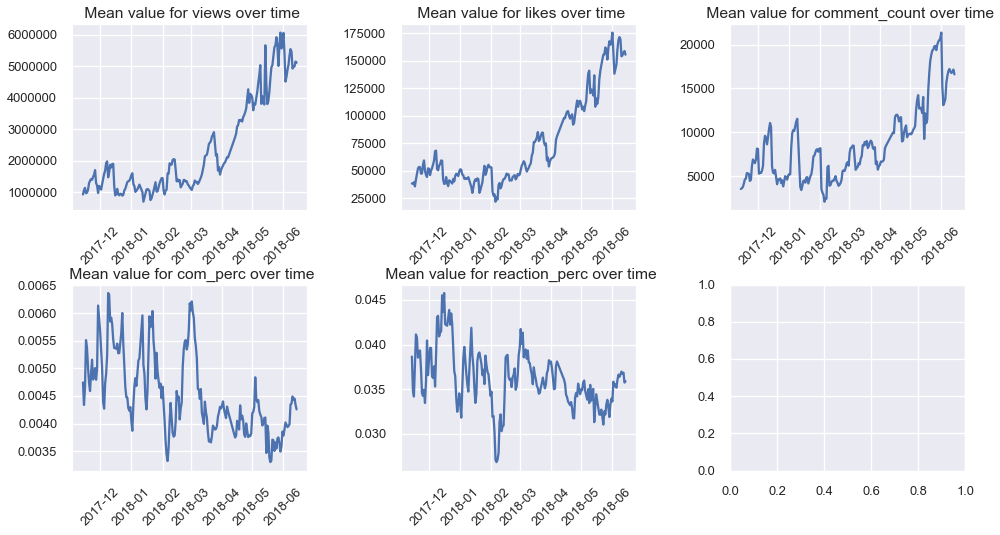

In [56]:
v = ["views", "likes", "comment_count", "com_perc","reaction_perc"]

plt.subplots(2,3, figsize=(16,8))
for i in range(len(v)):
    plt.subplot(2,3,i+1)
    varovertime(data, v[i])
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

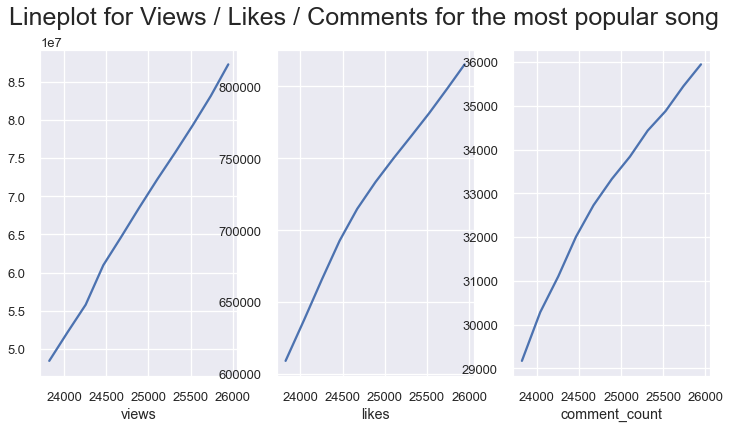

In [57]:
# Looking into the most viewed video

d2 = data[data["title"].str.contains("Préstamo")]
d2.shape

c2 = ["views", "likes", "comment_count"]
d3 = d2[c2]

plt.subplots(1,3, figsize=(12,6))

for i in range(len(c2)):
    plt.subplot(1,3,i+1)
    sns.lineplot(data=d3.iloc[:,i])
    plt.xlabel(c2[i])
    plt.suptitle("Lineplot for Views / Likes / Comments for the most popular song", fontsize=25)
plt.show()  

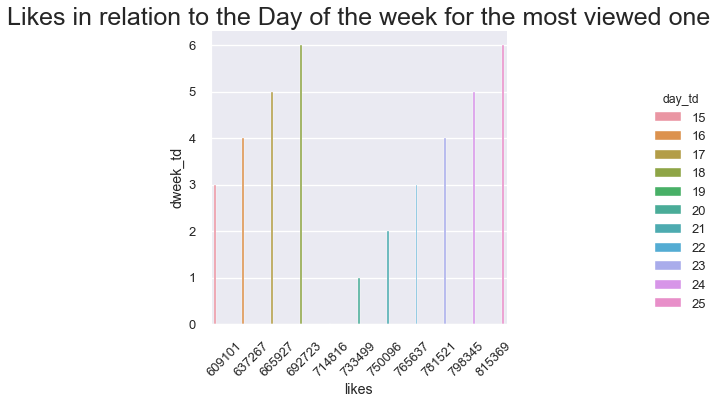

In [58]:
sns.factorplot(x="likes", y="dweek_td", hue="day_td", data=d2, kind="bar")
plt.xticks(rotation=45)
plt.title("Likes in relation to the Day of the week for the most viewed one", fontsize=25)
plt.show()

* Working on tags

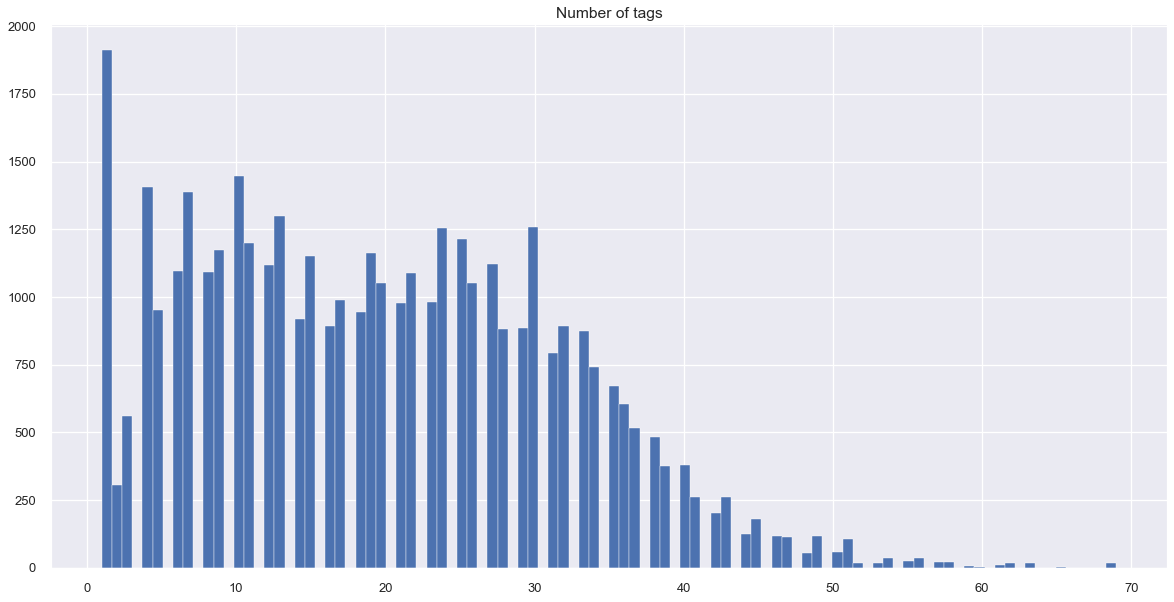

In [59]:
plt.figure(figsize=(20,10))
datatags = data.loc[:,["video_id", "tags"]]
data["tags_n"] = datatags["tags"].str.split("|").apply(len)
data["tags_n"].hist(bins=100)
plt.title("Number of tags")
plt.show()

# 3.- WORD CLOUD

It is one of the simplest ways of data visualization where the size of the tag represents its frequency and therefore, with the exclusion of the stopwords, its importance.

In [60]:
text = data["tags"]

words= " "

for w in text:
    w = str(w) 
    tokens = w.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    words += " ".join(tokens)+" "


In [61]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=800, height=400,
                          background_color='black', 
                          max_words=300,
                          max_font_size=40).generate(words)

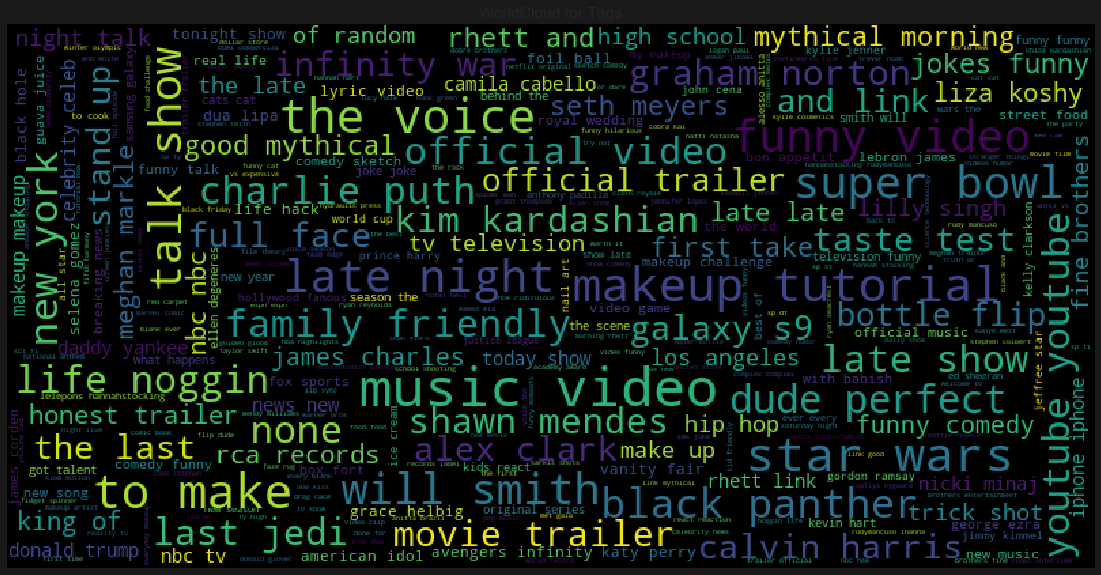

In [62]:
plt.figure(figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud)
plt.title("WorldCloud for Tags")
plt.axis('off')
plt.show()

# 4.- Tfidfvectorizer

Our aim is to scale the words giving a greater impact to words with less frequency, that is, trying to find very specific words which are the most representative and informative ones.

We are considering the token pattern that excludes tokens with only numbers and one letter word. The ngram_range is 1,1 which matches one word each time. 

In [63]:
word_vectorizer = TfidfVectorizer(
    min_df=1,
    sublinear_tf=False,
    strip_accents='unicode',
    token_pattern=u'(?ui)\\b\\w*[a-z]+\\w+\\b',
    stop_words='english',
    ngram_range=(1, 1),
    smooth_idf=True,
    max_features=10000)
word_vectorizer.fit(data["title"])
word_features = word_vectorizer.transform(data["title"])

In [64]:
Tfidfvect = pd.DataFrame(word_vectorizer.idf_, word_vectorizer.get_feature_names()).reset_index()
Tfidfvect.columns=("Word","Tfidf_weights")
Tfidfvect = Tfidfvect.sort_values(by=["Tfidf_weights"], ascending = False)
Tfidfvect_40 = Tfidfvect[:40]

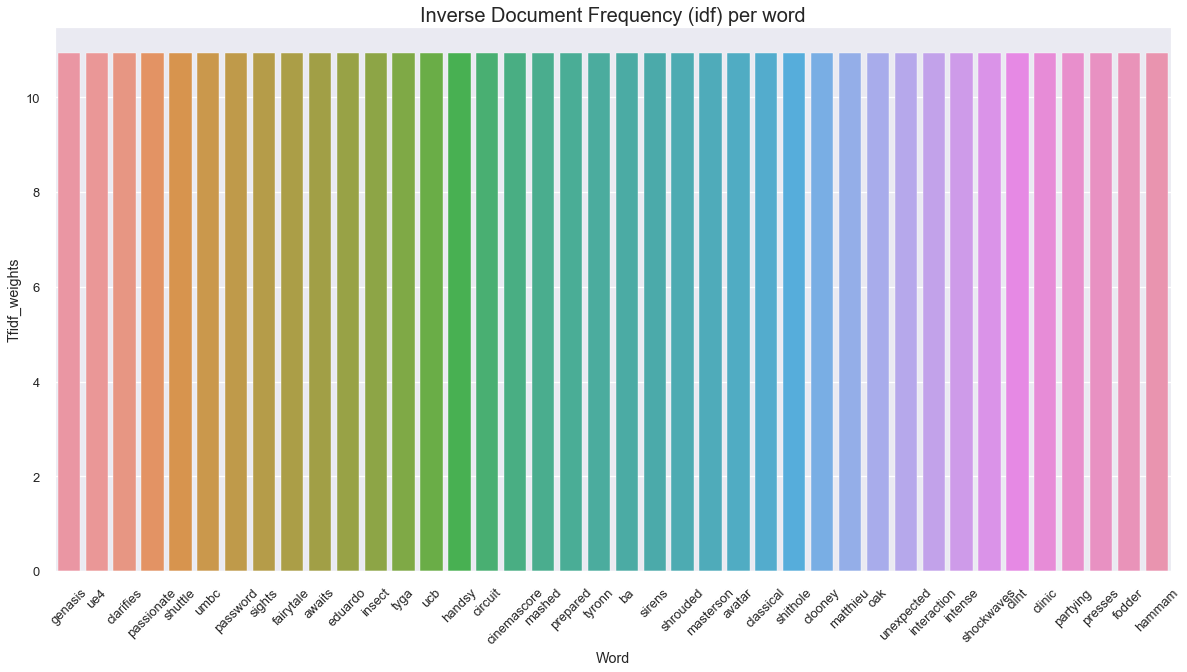

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(x='Word', y='Tfidf_weights', data=Tfidfvect_40)            
plt.title("Inverse Document Frequency (idf) per word", fontsize=20)
plt.xticks(rotation=45)

plt.show()

In [67]:
indices = np.argsort(word_vectorizer.idf_)[::-1]
features = word_vectorizer.get_feature_names()
idfv = word_features.data
top_n = 100000
top_features = [features[i] for i in indices[:top_n]]
top = [idfv[i] for i in indices[:top_n]]
d = dict(zip(top_features, top))

In [68]:
iftvect = pd.DataFrame.from_dict(d, orient="index").reset_index()
iftvect.columns=("Word", "W_vect_transf.")
iftvect = iftvect.sort_values(by=["W_vect_transf."], ascending=True)

In [69]:
iftvect

,Word,W_vect_transf.
4922,coco,0.113867
8620,favorites,0.113867
3802,ambrosio,0.113867
2393,invades,0.113867
4785,organize,0.117154
...,...,...
4054,supplies,1.000000
5974,rescued,1.000000
9003,li,1.000000
4307,gaining,1.000000


## 5.- LINEAR REGRESSION

Trying to answer if there is any linear relationship between "views", "likes", "dislikes" and "comment_count" standarized variables and the new variable with the number of tags and only for videos which have > 6 days of trend.

As per below results and given the almost 0 coefficients, it seems there is no linear dependence and the number of tags does not help us to infer how good or bad the video is performing. 

In [70]:
# Standarization of the variables 

data["views_st"] = (data["views"]-data["views"].mean()) / (data["views"].std())
data["views_st"] = (data["views"]-data["views"].mean()) / (data["views"].std())

data["likes_st"] = (data["likes"]-data["likes"].mean()) / (data["likes"].std())
data["likes_st"] = (data["likes"]-data["likes"].mean()) / (data["likes"].std())

data["dislikes_st"] = (data["dislikes"]-data["dislikes"].mean()) / (data["dislikes"].std())
data["dislikes_st"] = (data["dislikes"]-data["dislikes"].mean()) / (data["dislikes"].std())

data["comment_count_st"] = (data["comment_count"]-data["comment_count"].mean()) / (data["comment_count"].std())
data["comment_count_st"] = (data["comment_count"]-data["comment_count"].mean()) / (data["comment_count"].std())

In [71]:
cols_st = ['video_id', 'views_st','likes_st','dislikes_st','comment_count_st','tags_n']

In [72]:
new_df = data[cols_st].groupby(["video_id"])

In [73]:
# Linear Regression (y=number of tags & X = [views, likes, dislikes, comments_count])

datalr = []

for vid,rows in new_df:
    data_rows = rows.drop(['video_id'],axis=1).drop(['tags_n'],axis=1)
    days_trend = len(data_rows)
    if days_trend >6:
        X = data_rows
        y = rows["tags_n"].values.reshape(-1,1)
        lr = LinearRegression()
        lr.fit(X, y)
        views_c = lr.coef_[0][0]
        likes_c = lr.coef_[0][1]
        dislikes_c = lr.coef_[0][2]
        comment_c = lr.coef_[0][3]
        datalr.append([vid, days_trend, views_c,likes_c,dislikes_c,comment_c])
data_lr = pd.DataFrame(datalr, columns = ['Video ID', 'Trending Dur.','view_coef','likes_coef','dislikes_coef','comment_count_coef']) 


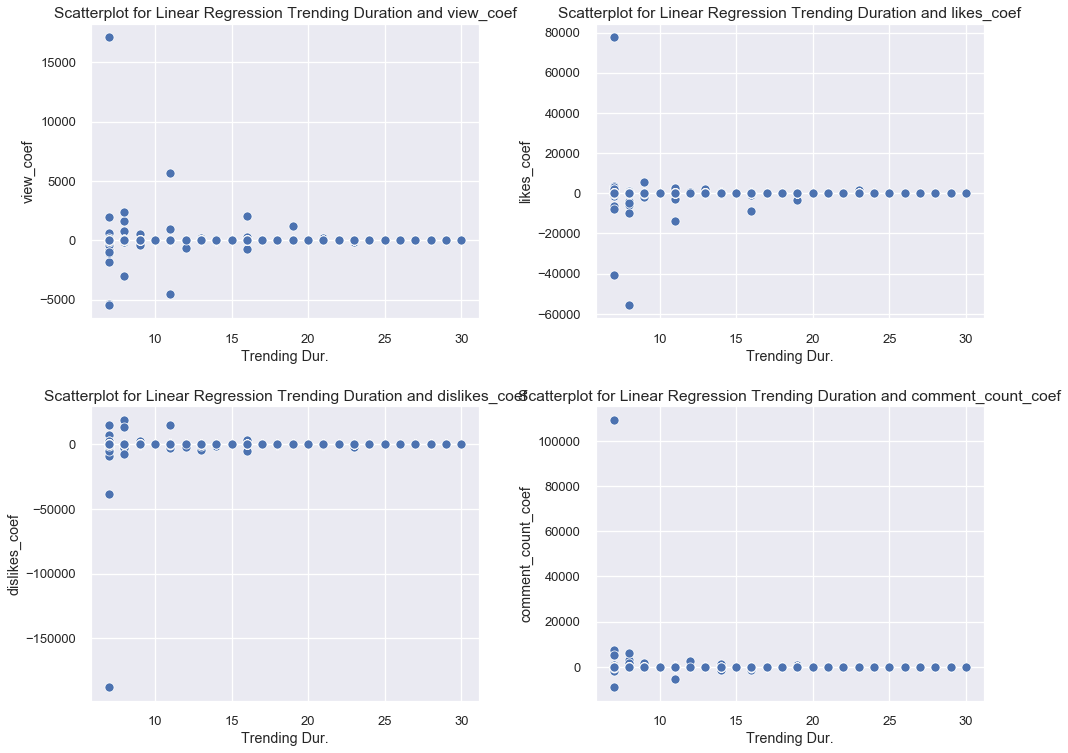

In [74]:
crr = ['view_coef','likes_coef','dislikes_coef','comment_count_coef']

plt.subplots(2,2, figsize=(16,8))
k=0

for i in crr:
    k+=1
    plt.subplot(2,2, k)
    sns.scatterplot(x=data_lr.loc[:,"Trending Dur."], y=data_lr.loc[:,i])
    plt.title(f"Scatterplot for Linear Regression Trending Duration and {i}")
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3,top = 1.3)
plt.show()

# 6.- RIDGE REGRESSION


Ridge Regression differs from Linear Regression because Ridge Reg. introduces a regularization term in order to prevent overfitting. The key is that this regression tries to find a balance between minimizing the residual sum of squares and the coefficients.

The alpha parameter controls how strong the regularization is. When alpha = 1 the model correponds to Linear Regression.

Similarly to Linear Regression, coefficients are quite close to 0 so we cannot find a linear or polynomial relationship between the number of tags and "views", "likes", "dislikes" and "comment_count" standarized variables for videos with > 6 days of Trending Duration.

In [75]:
datarr = []

for vid, rows in new_df:
    data_rows = rows.drop(["video_id"], axis=1).drop(['tags_n'],axis=1)
    days_trend = len(data_rows)
    if days_trend > 6:
        X = data_rows
        y = rows["tags_n"].values.reshape(-1,1)
        ridge = Ridge()
        parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 5, 15, 20]}
        ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=4)
        ridge_regressor.fit(X, y)
        datarr.append([vid, days_trend, ridge_regressor.best_params_['alpha'], ridge_regressor.best_score_])
data_rr = pd.DataFrame(datarr, columns = ['Video ID', 'Trending Duration','intercept','coef']) 

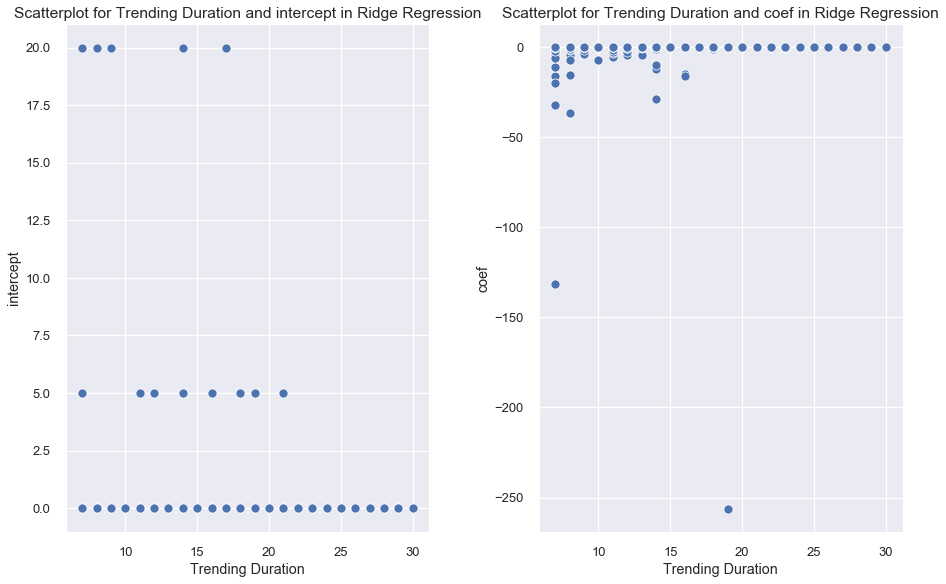

In [76]:
crr = ['intercept','coef']

plt.subplots(1,2, figsize=(15,6))
k=0

for i in crr:
    k+=1
    plt.subplot(1,2, k)
    sns.scatterplot(x=data_rr.loc[:,"Trending Duration"], y=data_rr.loc[:,i])
    plt.title(f"Scatterplot for Trending Duration and {i} in Ridge Regression")
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3,top = 1.3)
plt.show()

# 7. - QUICK SENTIMENT ANALYSIS WITH TEXTBLOB

TextBlob is an easy Python library which is capable of determining the "emotion" with the attributes "polarity" and "subjectivity" within a text.
"Polarity" has a range [-1,1]
"Subjectivity" has a range [0,1]

As per below results, it seems the polarity of description for YouTube videos in this dataset is quite positive.

In [77]:
b_list = []

descrip_s  = data["description"].astype(str)

for i in descrip_s:
    blob = TextBlob(i)
    b_list.append([i, blob.sentiment.polarity, blob.sentiment.subjectivity])
    sent_polar_df = pd.DataFrame(b_list, columns = ['sentence','polarity','subjectivity'])

In [78]:
sent_polar_df.loc[(sent_polar_df["polarity"]>0), "Sent._Type"] = "Positive"
sent_polar_df.loc[(sent_polar_df["polarity"]<0), "Sent._Type"] = "Negative"  
sent_polar_df.loc[(sent_polar_df["polarity"]==0), "Sent._Type"] = "Neutral"
    
sent_polar_df["Sent._Type"].value_counts()

Positive    32606
Neutral      4522
Negative     3821
Name: Sent._Type, dtype: int64

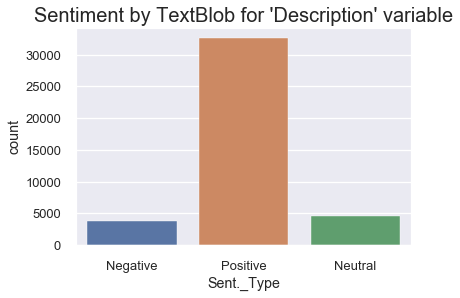

In [79]:
sns.countplot(x="Sent._Type", data=sent_polar_df)
plt.title("Sentiment by TextBlob for 'Description' variable", fontsize=20)
plt.show()

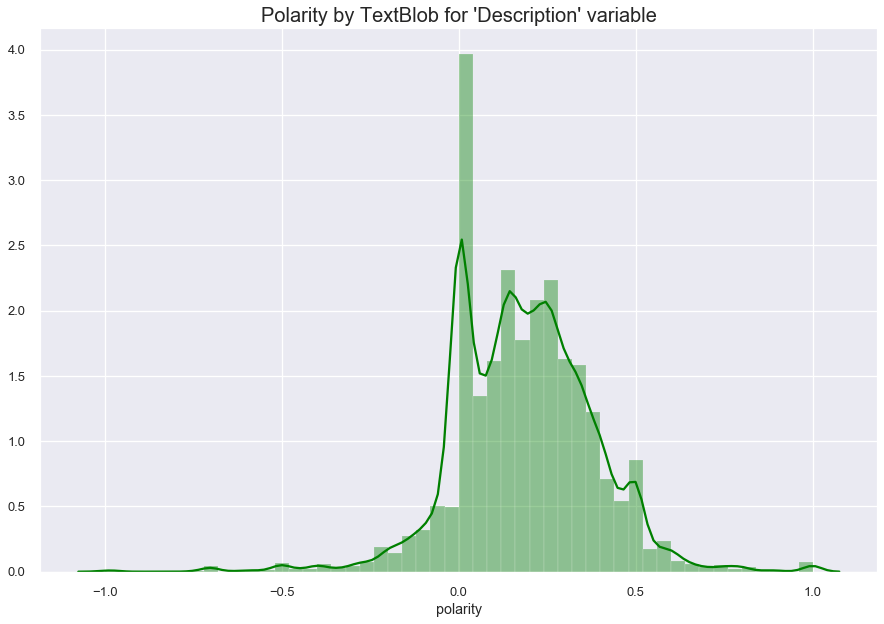

In [95]:
plt.figure(figsize=(15,10))
sns.distplot(sent_polar_df["polarity"], kde=True, color="green")
plt.title("Polarity by TextBlob for 'Description' variable", fontsize=20)
plt.show()

In [96]:
data_c = ["title", "description", "tags"]

s_list = []

for i in data_c:
    rows = data.loc[:,i].astype(str)
    for j in rows:
        blob = TextBlob(j)
        s_list.append([j, i, blob.sentiment.polarity, blob.sentiment.subjectivity])
    sent_df = pd.DataFrame(s_list, columns=["Row", "Col", "Sentiment", "Polarity"])

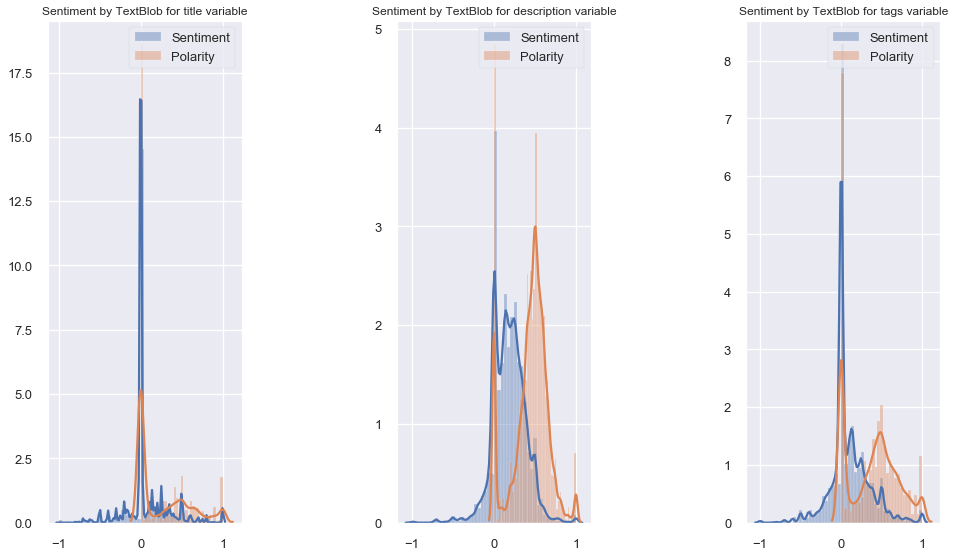

In [122]:
plt.subplots(1,3, figsize=(16,9))
k=0
for i in data_c:
    k+=1
    plt.subplot(1,3,k)
    sns.distplot(sent_df["Sentiment"][sent_df["Col"]==i], label="Sentiment")
    sns.distplot(sent_df["Polarity"][sent_df["Col"]==i], label="Polarity")
    plt.legend()
    plt.xlabel(None)
    plt.title(f"Sentiment by TextBlob for {i} variable", fontsize=12)
    plt.subplots_adjust(wspace = 0.8, hspace = 0.8,top = 0.9)
plt.show()

Thank you for reading!!